# Polynomial Regression

Formula -> y_pred = ax^2 + bx + c 

In [39]:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [41]:
from sklearn.linear_model import LinearRegression

lgr = LinearRegression()

lgr.fit(X_poly, y)

LinearRegression()

In [42]:
lgr.intercept_

array([1.94269709])

In [43]:
lgr.coef_

array([[1.00593756, 0.5496203 ]])

In [44]:
pred = lgr.predict(X_poly)

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgr, X_poly, y, cv=12, scoring='neg_mean_squared_err')

In [62]:
scores

array([ 0.89078594,  0.94565292, -1.05464376,  0.78626773,  0.92778896,
        0.89672128,  0.56192038,  0.87195656,  0.85235424,  0.69783153,
       -0.0741251 ,  0.77734042])

In [47]:
from sklearn.model_selection import cross_val_predict

prediction = cross_val_predict(lgr, X_poly, y, cv=3)

In [48]:
lgr.score(X_poly, y)

0.8696568999291849

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")



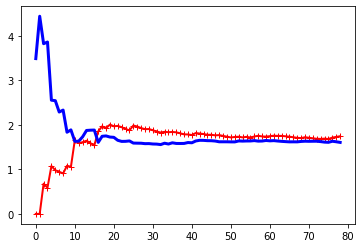

In [50]:
plot_learning_curves(lgr, X, y)